In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Imports
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

from filter_tc.particle_filter import *

In [5]:
start = datetime.datetime(2022, 9, 1)
end = datetime.datetime(2022, 9, 2)
data_path = \
    "_".join(
        [
            "../data/scb/almere/strain/raw/strain_data",
            str(start.year),
            str(start.month),
            str(start.day),
            str(end.year),
            str(end.month),
            str(end.day),
            ".parquet"
        ]
    )
strain_data = pd.read_parquet(data_path)


In [6]:
BCN_data = strain_data.filter(regex='BCN')
TCN_data = strain_data.filter(regex='TCN')
TFBG_data = strain_data.filter(regex='TFBG')
bottom_TFBG_data = TFBG_data.filter(regex='_B')
web_TFBG_data = TFBG_data.filter(regex='_W')
top_TFBG_data = TFBG_data[TFBG_data.columns.difference(bottom_TFBG_data.columns).difference(web_TFBG_data.columns)]
# FIXME:: How to handle when multiple temperature sensors are available?
mean_top_TFBG_data = pd.DataFrame({'mean_top_TFBG':top_TFBG_data.mean(axis=1)})

In [ ]:
start = 900100
stop = start + 10000

BCN_sep005 = pandas_to_sep005(BCN_data.iloc[start:stop], "BCN", "microstrain")
TCN_sep005 = pandas_to_sep005(TCN_data.iloc[start:stop], "TCN", "microstrain")
TFBG_sep005 = pandas_to_sep005(TFBG_data.iloc[start:stop], "TFBG", "microstrain")
bottom_TFBG_sep005 = pandas_to_sep005(bottom_TFBG_data.iloc[start:stop], "bottom_TFBG", "microstrain")
web_TFBG_sep005 = pandas_to_sep005(web_TFBG_data.iloc[start:stop], "web_TFBG", "microstrain")
top_TFBG_sep005 = pandas_to_sep005(mean_top_TFBG_data.iloc[start:stop], "top_TFBG", "microstrain")

In [ ]:
measurements = BCN_sep005
inputs = bottom_TFBG_sep005
loading = 'tension'

filtered_data = \
    temp_comp_pf(
        measurements,
        inputs,
        loading,
        num_particles=100,
        r_measurement_noise=1e2,
        q_process_noise=np.array([5e-3, 1]),
        scale=1e-3)

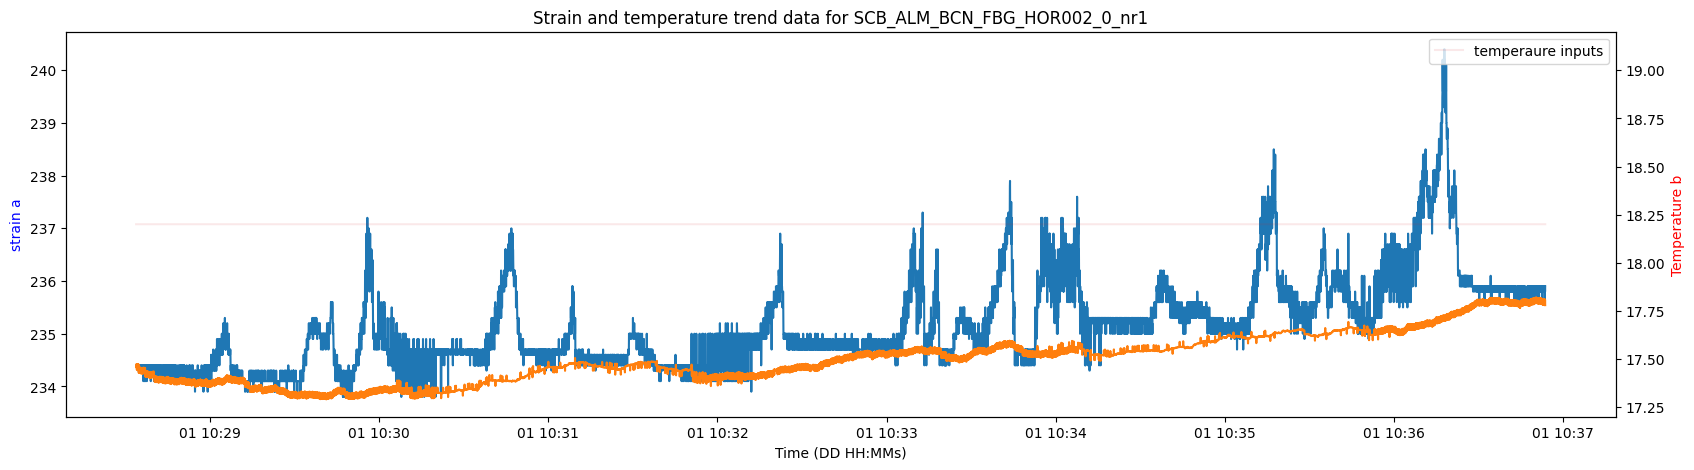

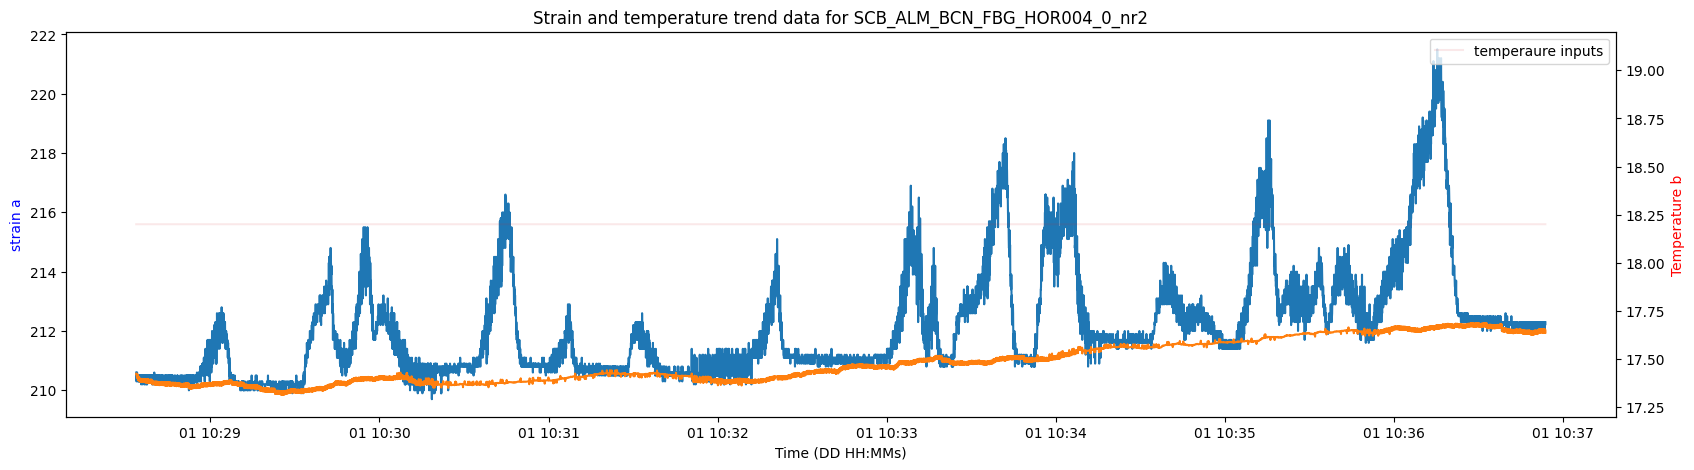

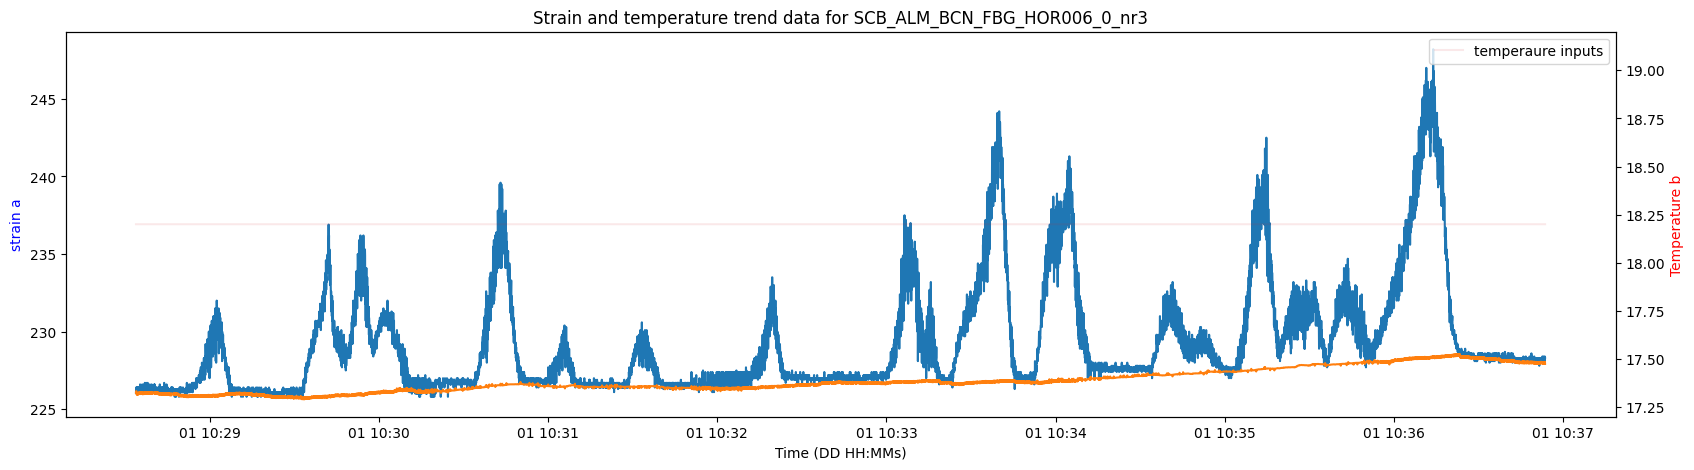

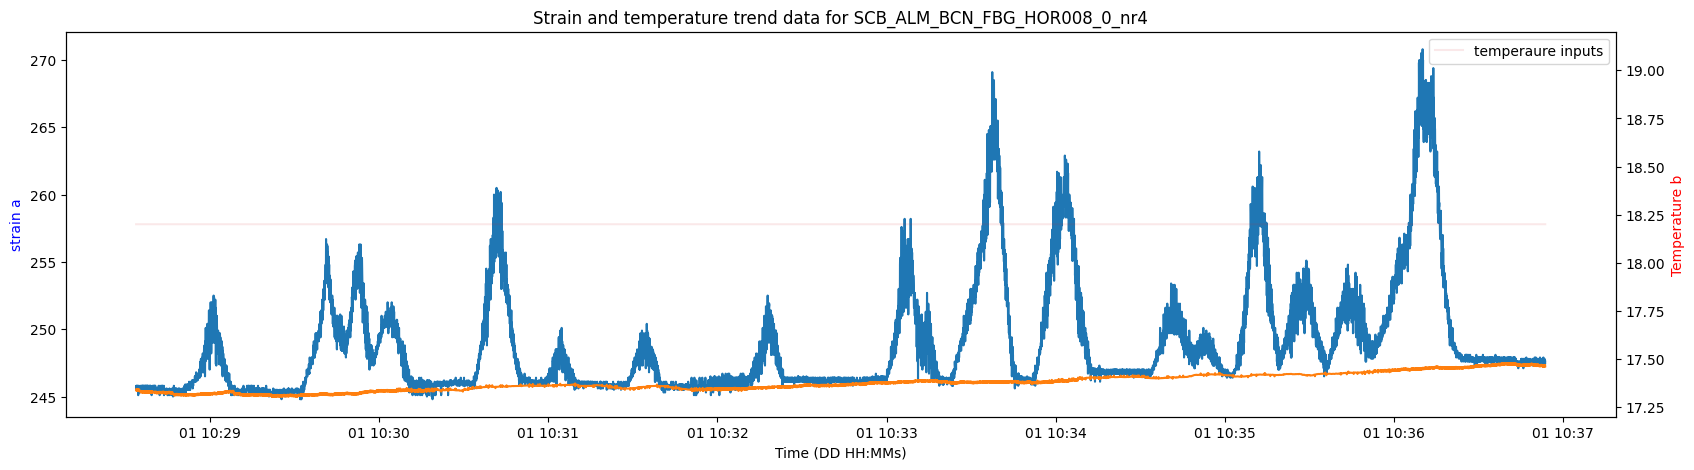

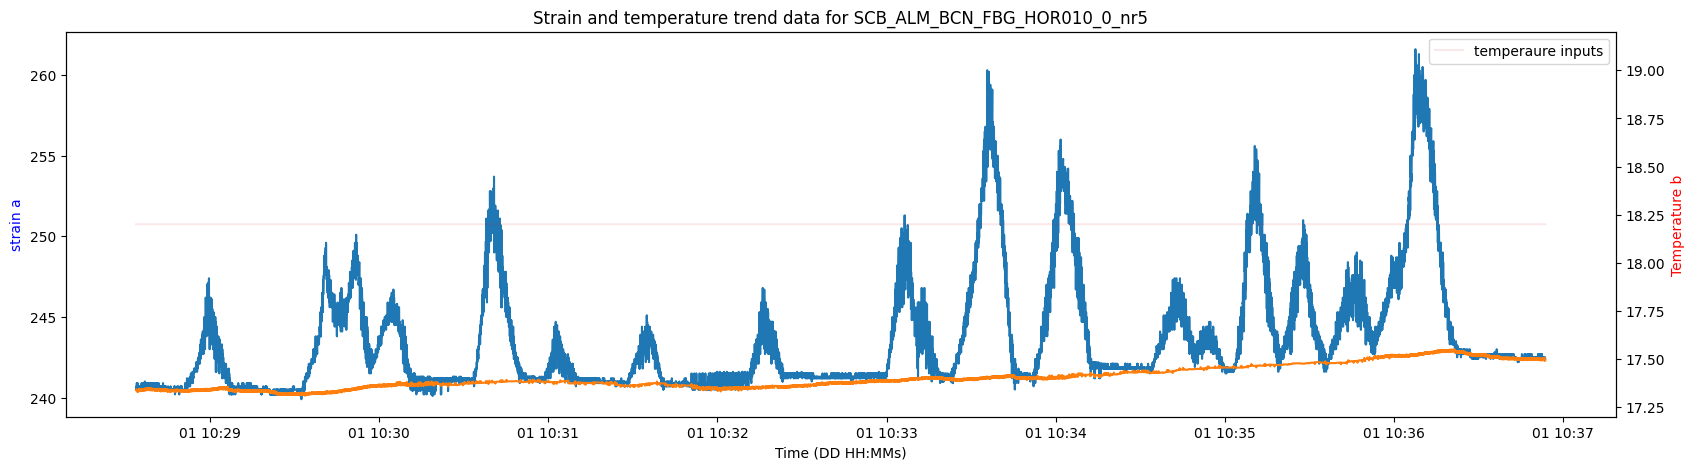

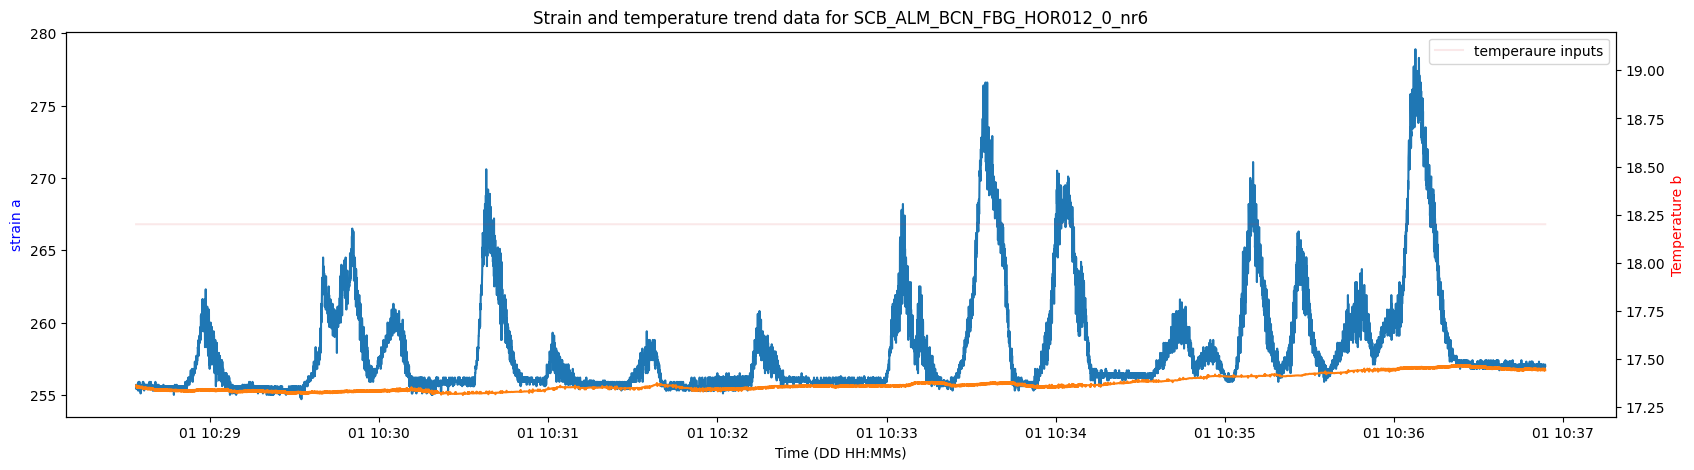

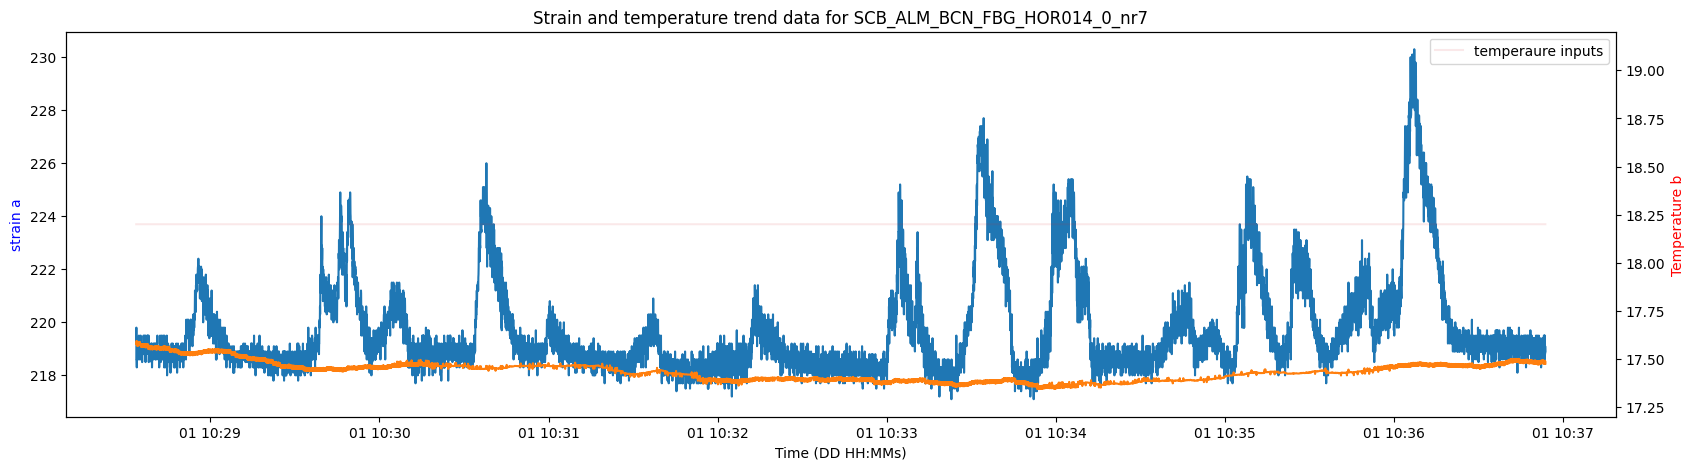

In [ ]:
for i, channel in enumerate(filtered_data['channel_names']):
    plot_temperature_trend_data = pd.DataFrame(
        {'temperature_trend_data':  filtered_data['temperature_trend_data'][i]},
        index = filtered_data['time'][i])

    plot_measurements_data = pd.DataFrame(
        {'measurements': measurements['data'][i]},
        index = BCN_sep005["time"][i])

    plot_inputs_data = pd.DataFrame(
        {'inputs': inputs['data'][:,0]},
        index = inputs['time'][0])

    # Create a figure with two y-axes
    fig, ax1 = plt.subplots(figsize=(20,5))
    ax2 = ax1.twinx()

    # Plot the data on the respective axes
    ax2.plot(plot_inputs_data, alpha = 0.1, label='temperaure inputs', color='tab:red')
    ax1.plot(plot_measurements_data, label = 'strain measurement '+ channel, color='tab:blue')
    ax1.plot(plot_temperature_trend_data, label='temperature trend data ' + channel, color='tab:orange')
    plt.legend()
    # Set the labels and limits for the axes
    ax1.set_xlabel('Time (DD HH:MMs)')
    ax1.set_ylabel('strain a', color='blue')
    ax2.set_ylabel('Temperature b', color='red')
    plt.title('Strain and temperature trend data for ' + channel)
    # Show the plot
    plt.show()

In [ ]:
# Get the filter channel_nr
channel_nr = 0
pf_channel = filtered_data['filters'][channel_nr]
pf_channel

ParticleFilter(num_particles=100, r_measurement_noise=100.0, q_process_noise=array([0.005, 1.   ]), scale=0.001, loc=-0.1, predictions=array([234.36676572, 234.41842374, 234.42172657, ..., 235.54769459,
       235.64700676, 235.54264718]))

In [ ]:
# Withe the filter states (weights and particles)
pf_channel.weights
pf_channel.particles

array([[235.64805839,  15.8170649 ],
       [235.58754694,  10.00431207],
       [235.5809579 ,  25.71388718],
       [235.58129236,  25.38304141],
       [235.58149428,  25.9058908 ],
       [235.60249892,  22.20438236],
       [235.59850851,  13.68249403],
       [235.5957551 ,  21.60471854],
       [235.58327526,  27.1092116 ],
       [235.58406124,  16.83445938],
       [235.64136853,  16.45138699],
       [235.58913328,  20.37453219],
       [235.58406678,  16.83443348],
       [235.59162796,  22.81975597],
       [235.5233126 ,  20.86796497],
       [235.57702364,  24.27903707],
       [235.53341179,  20.02395103],
       [235.59470496,  21.05302347],
       [235.6025003 ,  22.20440307],
       [235.59311578,  29.43497839],
       [235.56501822,  23.49738719],
       [235.5954295 ,  29.01647851],
       [235.59164063,  29.8870283 ],
       [235.58328211,  27.10921247],
       [235.59163569,  22.81973333],
       [235.58129041,  25.38290069],
       [235.63821219,  15.10697667],
 

# Same example but for top sensors

In [ ]:
measurements = TCN_sep005
inputs = top_TFBG_sep005
loading = 'compression'

# Other settings are required for the Top Sensors!!!
# FIXME:: OPTIONAL: Add a function to automatically determine the filter parameters
num_particles = 500
r_measurement_noise = 1e5
q_process_noise = np.array([2e-2, 1e-1])
scale = 1e-3

filtered_data = \
    temp_comp_pf(
        measurements,
        inputs,
        loading,
        num_particles,
        r_measurement_noise,
        q_process_noise,
        scale)

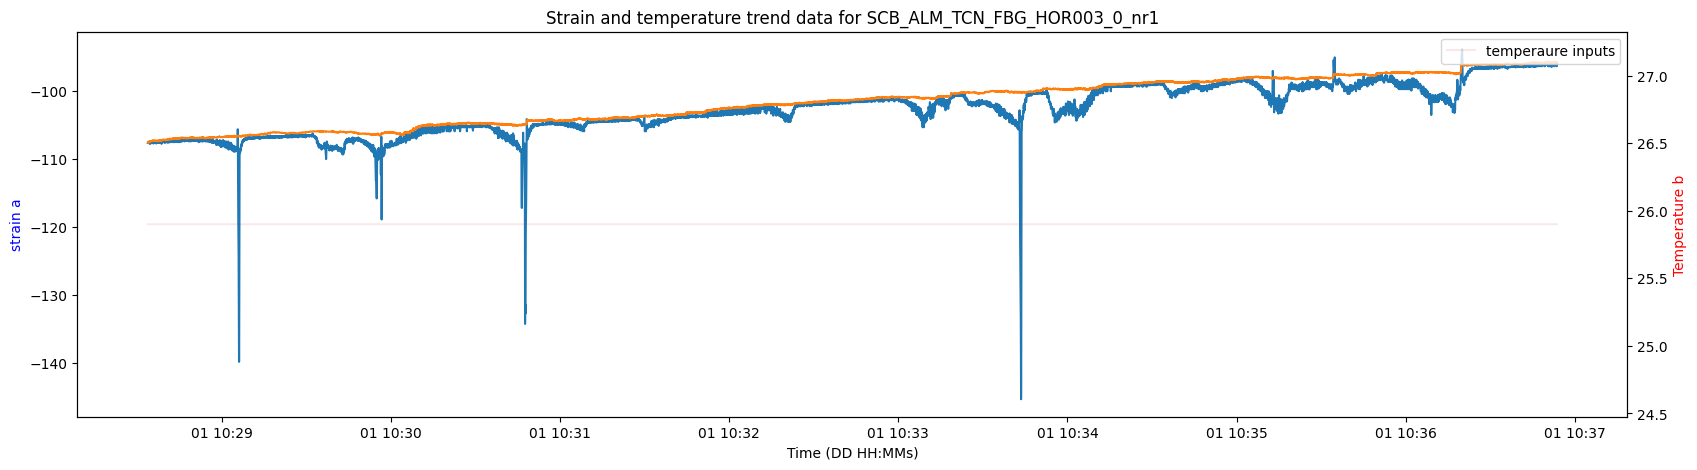

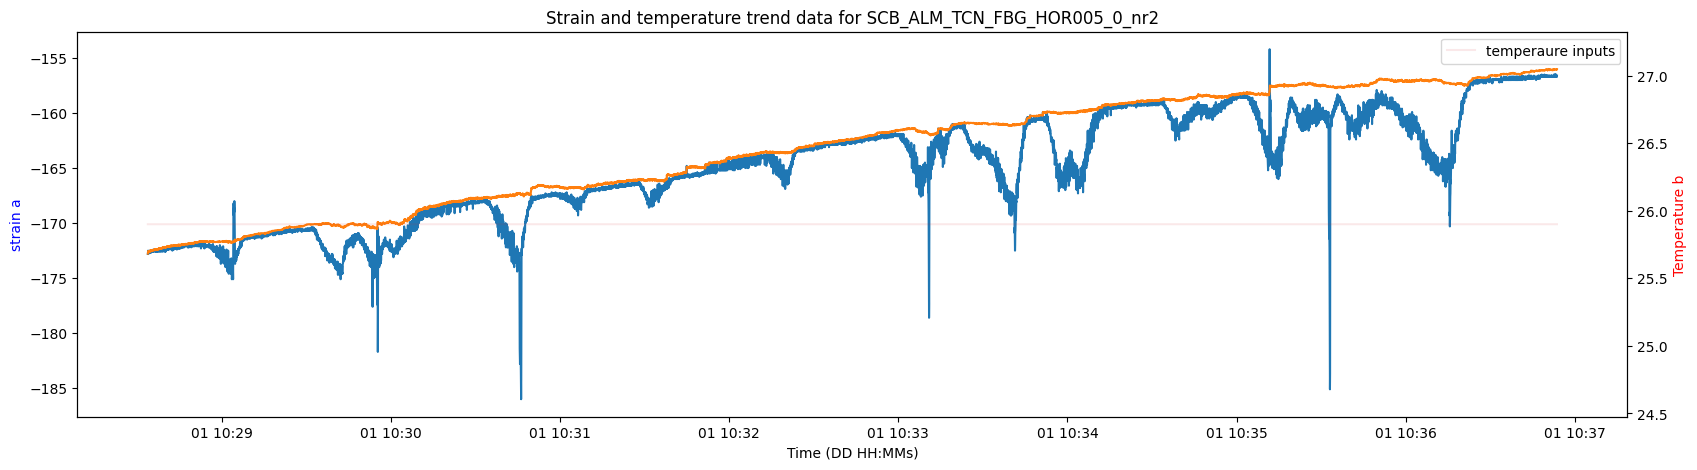

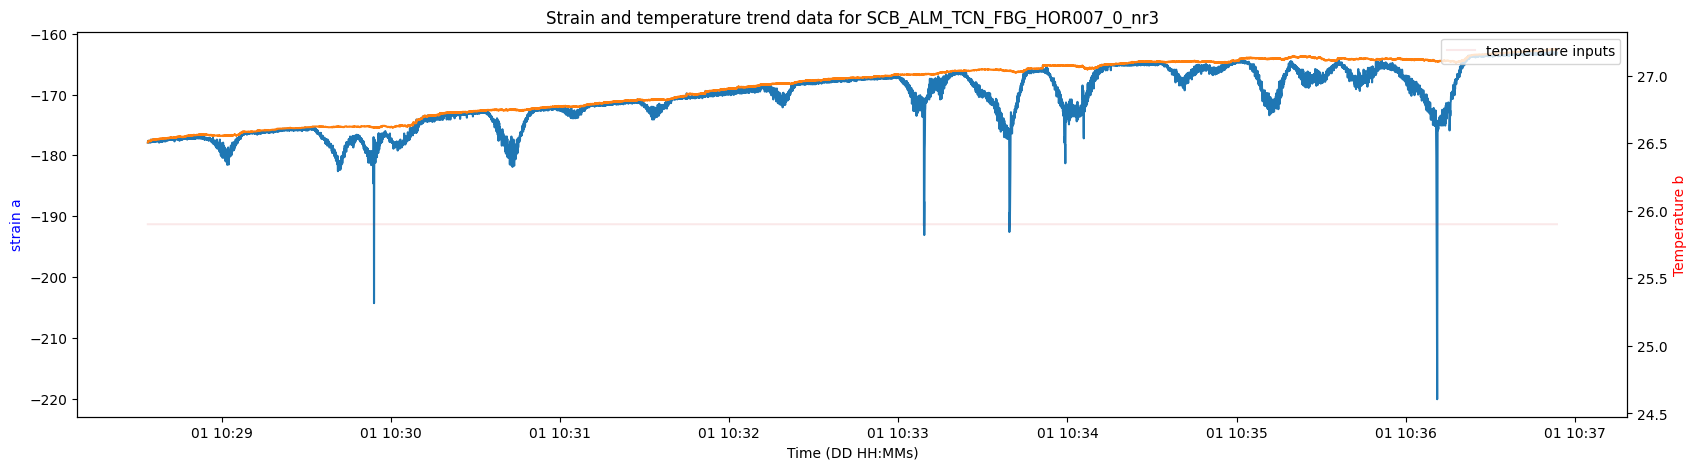

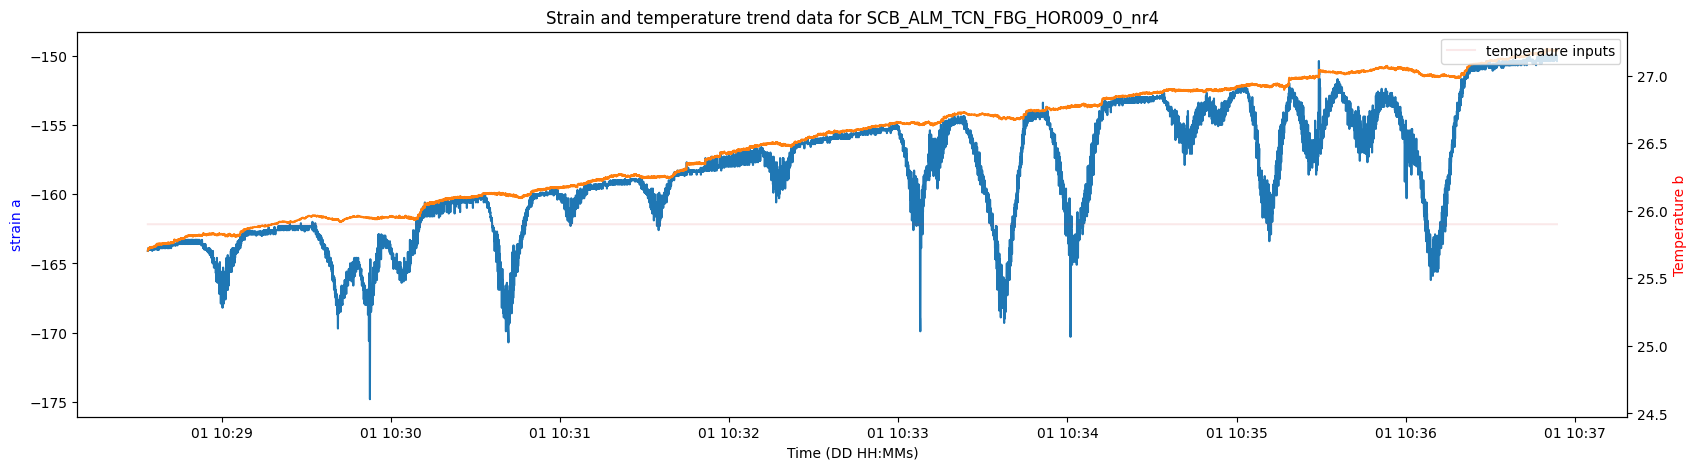

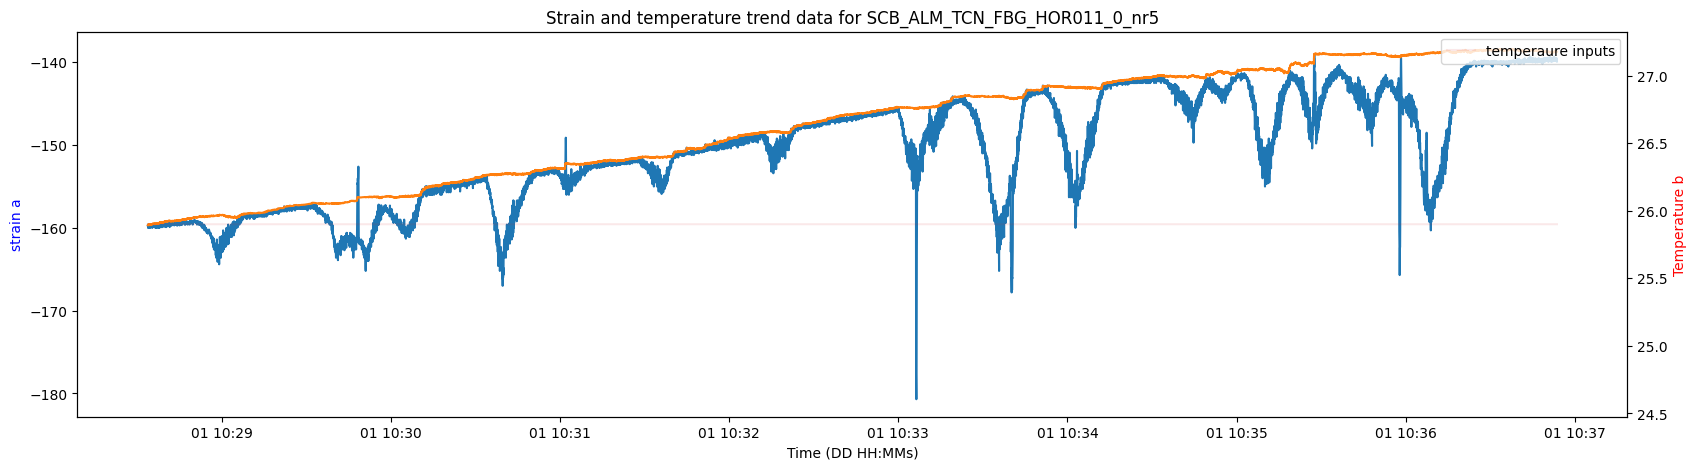

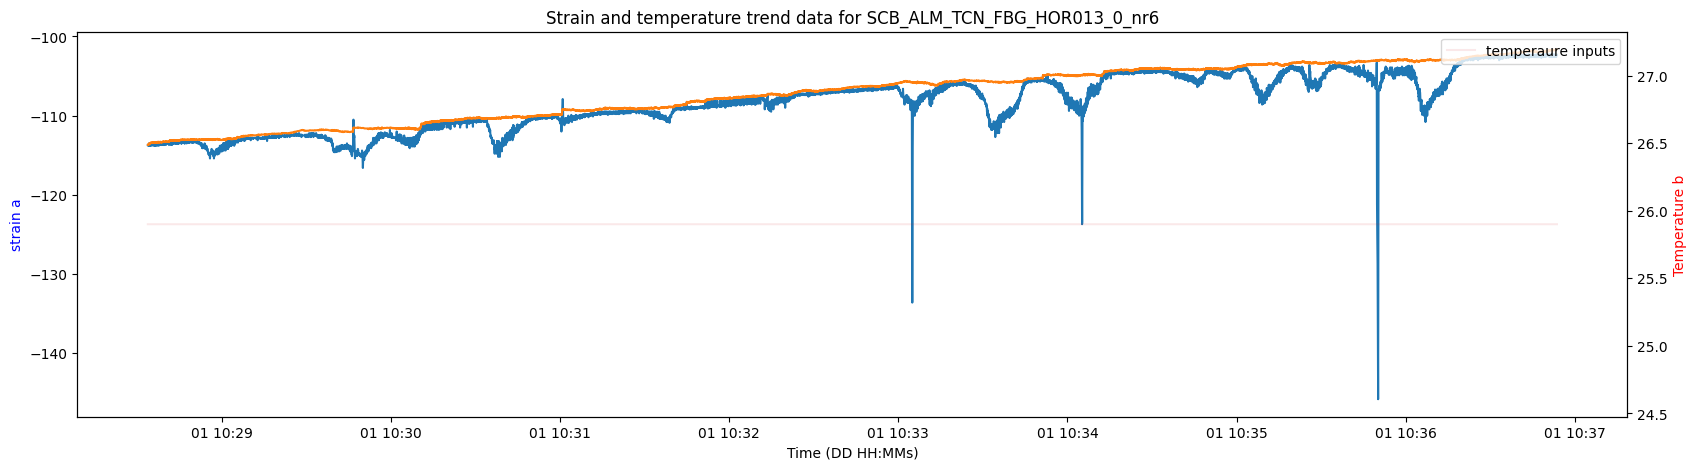

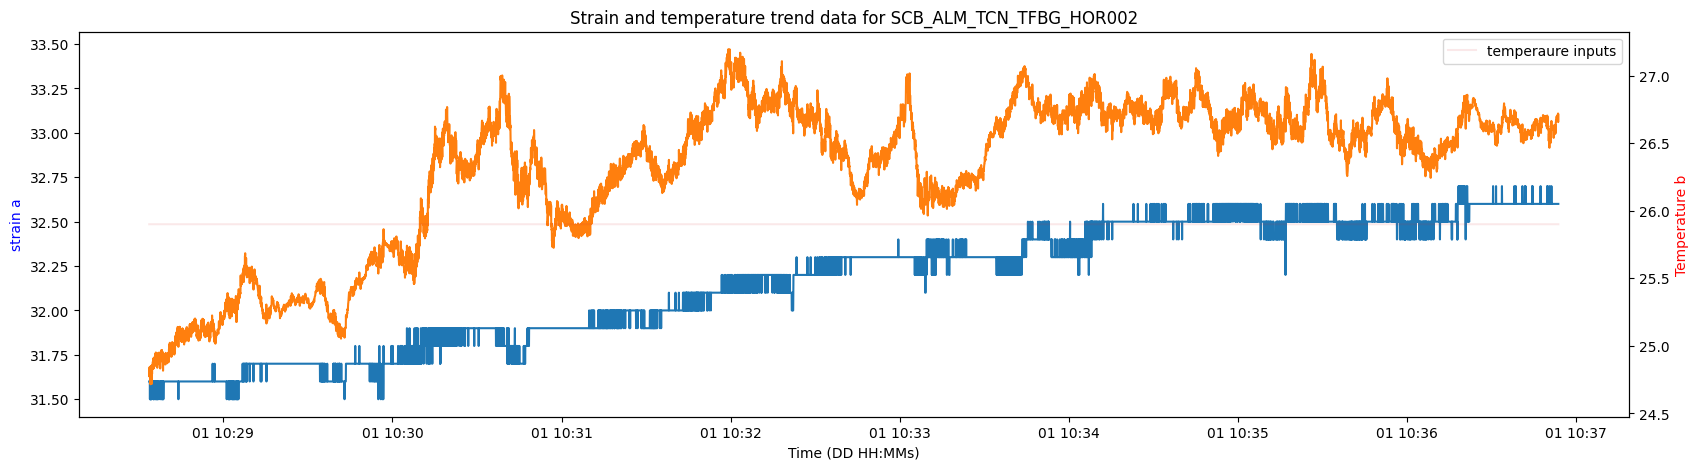

In [ ]:
for i, channel in enumerate(filtered_data['channel_names']):
    plot_temperature_trend_data = pd.DataFrame(
        {'temperature_trend_data':  filtered_data['temperature_trend_data'][i]},
        index = filtered_data['time'][i])

    plot_measurements_data = pd.DataFrame(
        {'measurements': measurements['data'][i]},
        index = BCN_sep005["time"][i])

    plot_inputs_data = pd.DataFrame(
        {'inputs': inputs['data'][:,0]},
        index = inputs['time'][0])

    # Create a figure with two y-axes
    fig, ax1 = plt.subplots(figsize=(20,5))
    ax2 = ax1.twinx()

    # Plot the data on the respective axes
    ax2.plot(plot_inputs_data, alpha = 0.1, label='temperaure inputs', color='tab:red')
    ax1.plot(plot_measurements_data, label = 'strain measurement '+ channel, color='tab:blue')
    ax1.plot(plot_temperature_trend_data, label='temperature trend data ' + channel, color='tab:orange')
    plt.legend()
    # Set the labels and limits for the axes
    ax1.set_xlabel('Time (DD HH:MMs)')
    ax1.set_ylabel('strain a', color='blue')
    ax2.set_ylabel('Temperature b', color='red')
    plt.title('Strain and temperature trend data for ' + channel)
    # Show the plot
    plt.show()